<a href="https://colab.research.google.com/github/Chromis07/dataStudy/blob/main/ML/DecisionTreeClassifier_%EC%9C%A0%EB%B0%A9%EC%95%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

문제 정의 : DecisionTreeClassifier 사용하여 Breast Cancer data set 사용하여 유방암 양성(2), label -> 악성(4) 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
# 한글 깨짐 방지
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


[Step 1] 데이터 준비 - UCI ML Repository 제공하는 Breast Cancer 데이터셋 가져오기


In [ ]:
# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)

In [ ]:
# 열 이름 지정
df.columns = ['id', 'clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses', 'class']

[Step 2] 데이터 탐색 및 데이터 전처리

In [ ]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithlial,bare_nuclei,chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
# 데이터 자료형 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               699 non-null    int64 
 1   clump            699 non-null    int64 
 2   cell_size        699 non-null    int64 
 3   cell_shape       699 non-null    int64 
 4   adhesion         699 non-null    int64 
 5   epithlial        699 non-null    int64 
 6   bare_nuclei      699 non-null    object
 7   chromatin        699 non-null    int64 
 8   normal_nucleoli  699 non-null    int64 
 9   mitoses          699 non-null    int64 
 10  class            699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [ ]:
# bare_nuclei 열의 자료형 변경 (문자열 -> 숫자형)
# bare_nuclei 열의 고유 값 확인
print(df['bare_nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [ ]:
# '?'를 np.nan으로 변경
df['bare_nuclei'].replace('?', np.nan, inplace=True)

In [ ]:
# np.nan으로 변경된 값 삭제
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True)

In [ ]:
# 문자열을 숫자형으로 변경
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               683 non-null    int64
 1   clump            683 non-null    int64
 2   cell_size        683 non-null    int64
 3   cell_shape       683 non-null    int64
 4   adhesion         683 non-null    int64
 5   epithlial        683 non-null    int64
 6   bare_nuclei      683 non-null    int64
 7   chromatin        683 non-null    int64
 8   normal_nucleoli  683 non-null    int64
 9   mitoses          683 non-null    int64
 10  class            683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


[Step 3] 분석에 사용할 속성 선택

In [ ]:
X = df[['clump', 'cell_size', 'cell_shape', 'adhesion', 'epithlial',
              'bare_nuclei', 'chromatin', 'normal_nucleoli', 'mitoses']] # 설명 변수 X
y = df['class'] # 예측 변수 Y

In [ ]:
X = preprocessing.StandardScaler().fit(X).transform(X)

[Step 4] 데이터셋 구분 - train / test

In [ ]:
# train data와 test 데이터로 구분 (7:3 비율)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

print(f'train의 개수 : {X_train.shape}')
print(f'test의 개수 : {X_test.shape}')

train의 개수 : (478, 9)
test의 개수 : (205, 9)


[Step 5] Deciosion Tree 분류 모형 - sklearn 사용

In [ ]:
# 모형 객체 생성 (최적의 속성을 찾기 위해 criterion='entropy' 적용) * 적정한 레벨 값 찾는 것
tree_model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
# train 데이터를 가지고 모델 학습
tree_model.fit(X_train, y_train)

# test 데이터를 가지고 모델 예측
y_hat = tree_model.predict(X_test) # 2 양성, 4 악성

[Step 6] 모형 성능 평가

In [ ]:
print(f"train set 정확도 : {tree_model.score(X_train, y_train)*100:.2f}")
print(f"test set 정확도 : {tree_model.score(X_test, y_test)*100:.2f}")

train set 정확도 : 97.28
test set 정확도 : 95.12


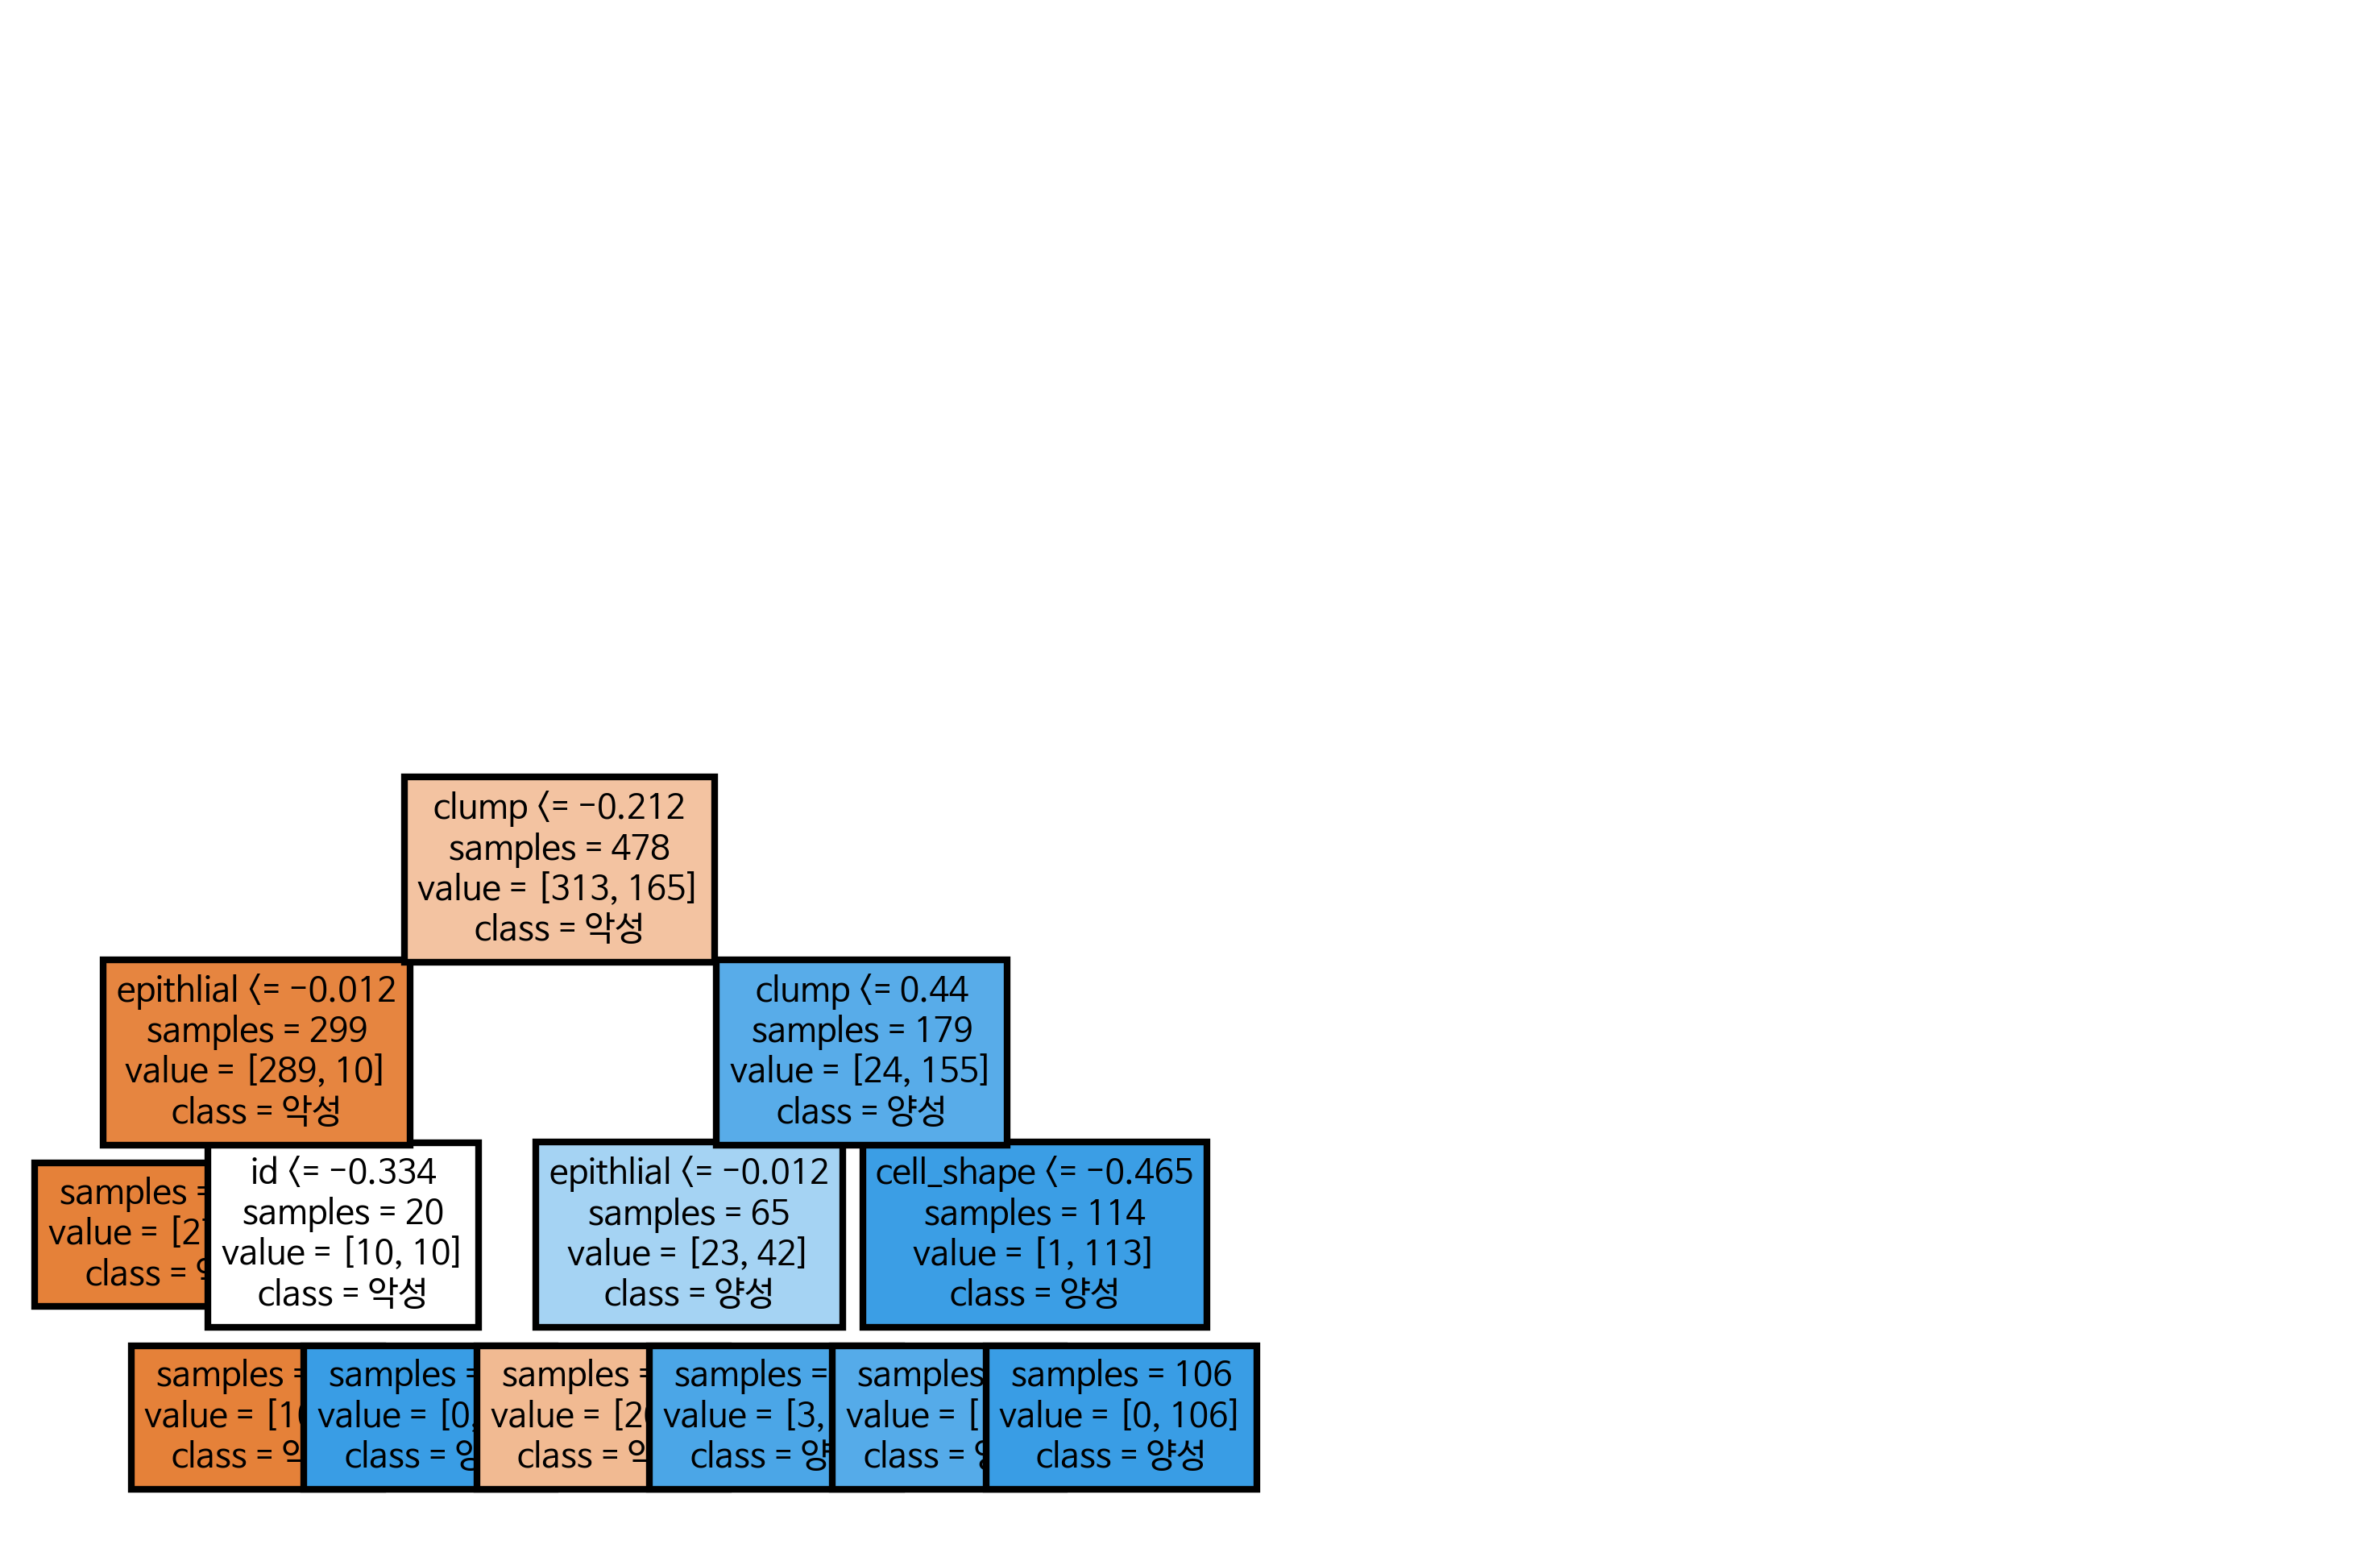

In [ ]:
from sklearn.tree import plot_tree
plt.figure(dpi=300)
plot_tree(tree_model, class_names=['악성', '양성'],
          feature_names=df.columns, impurity=False, filled = True)
plt.show()

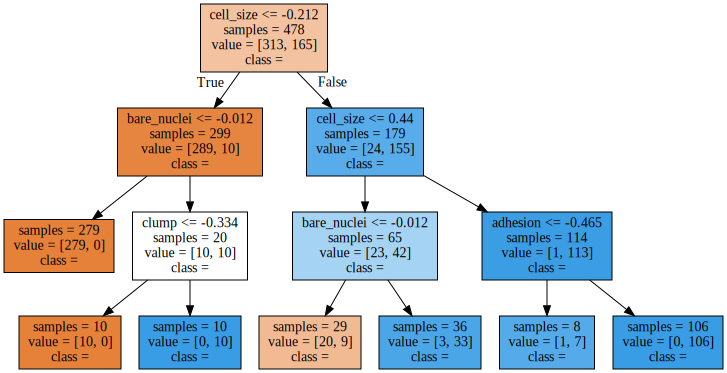

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree_model, out_file= 'tree.dot',class_names=['악성', '양성'],
          feature_names=df.columns[1:10], impurity=False, filled = True)

with open('tree.dot') as f :
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

최적의 max_depth 설정하기

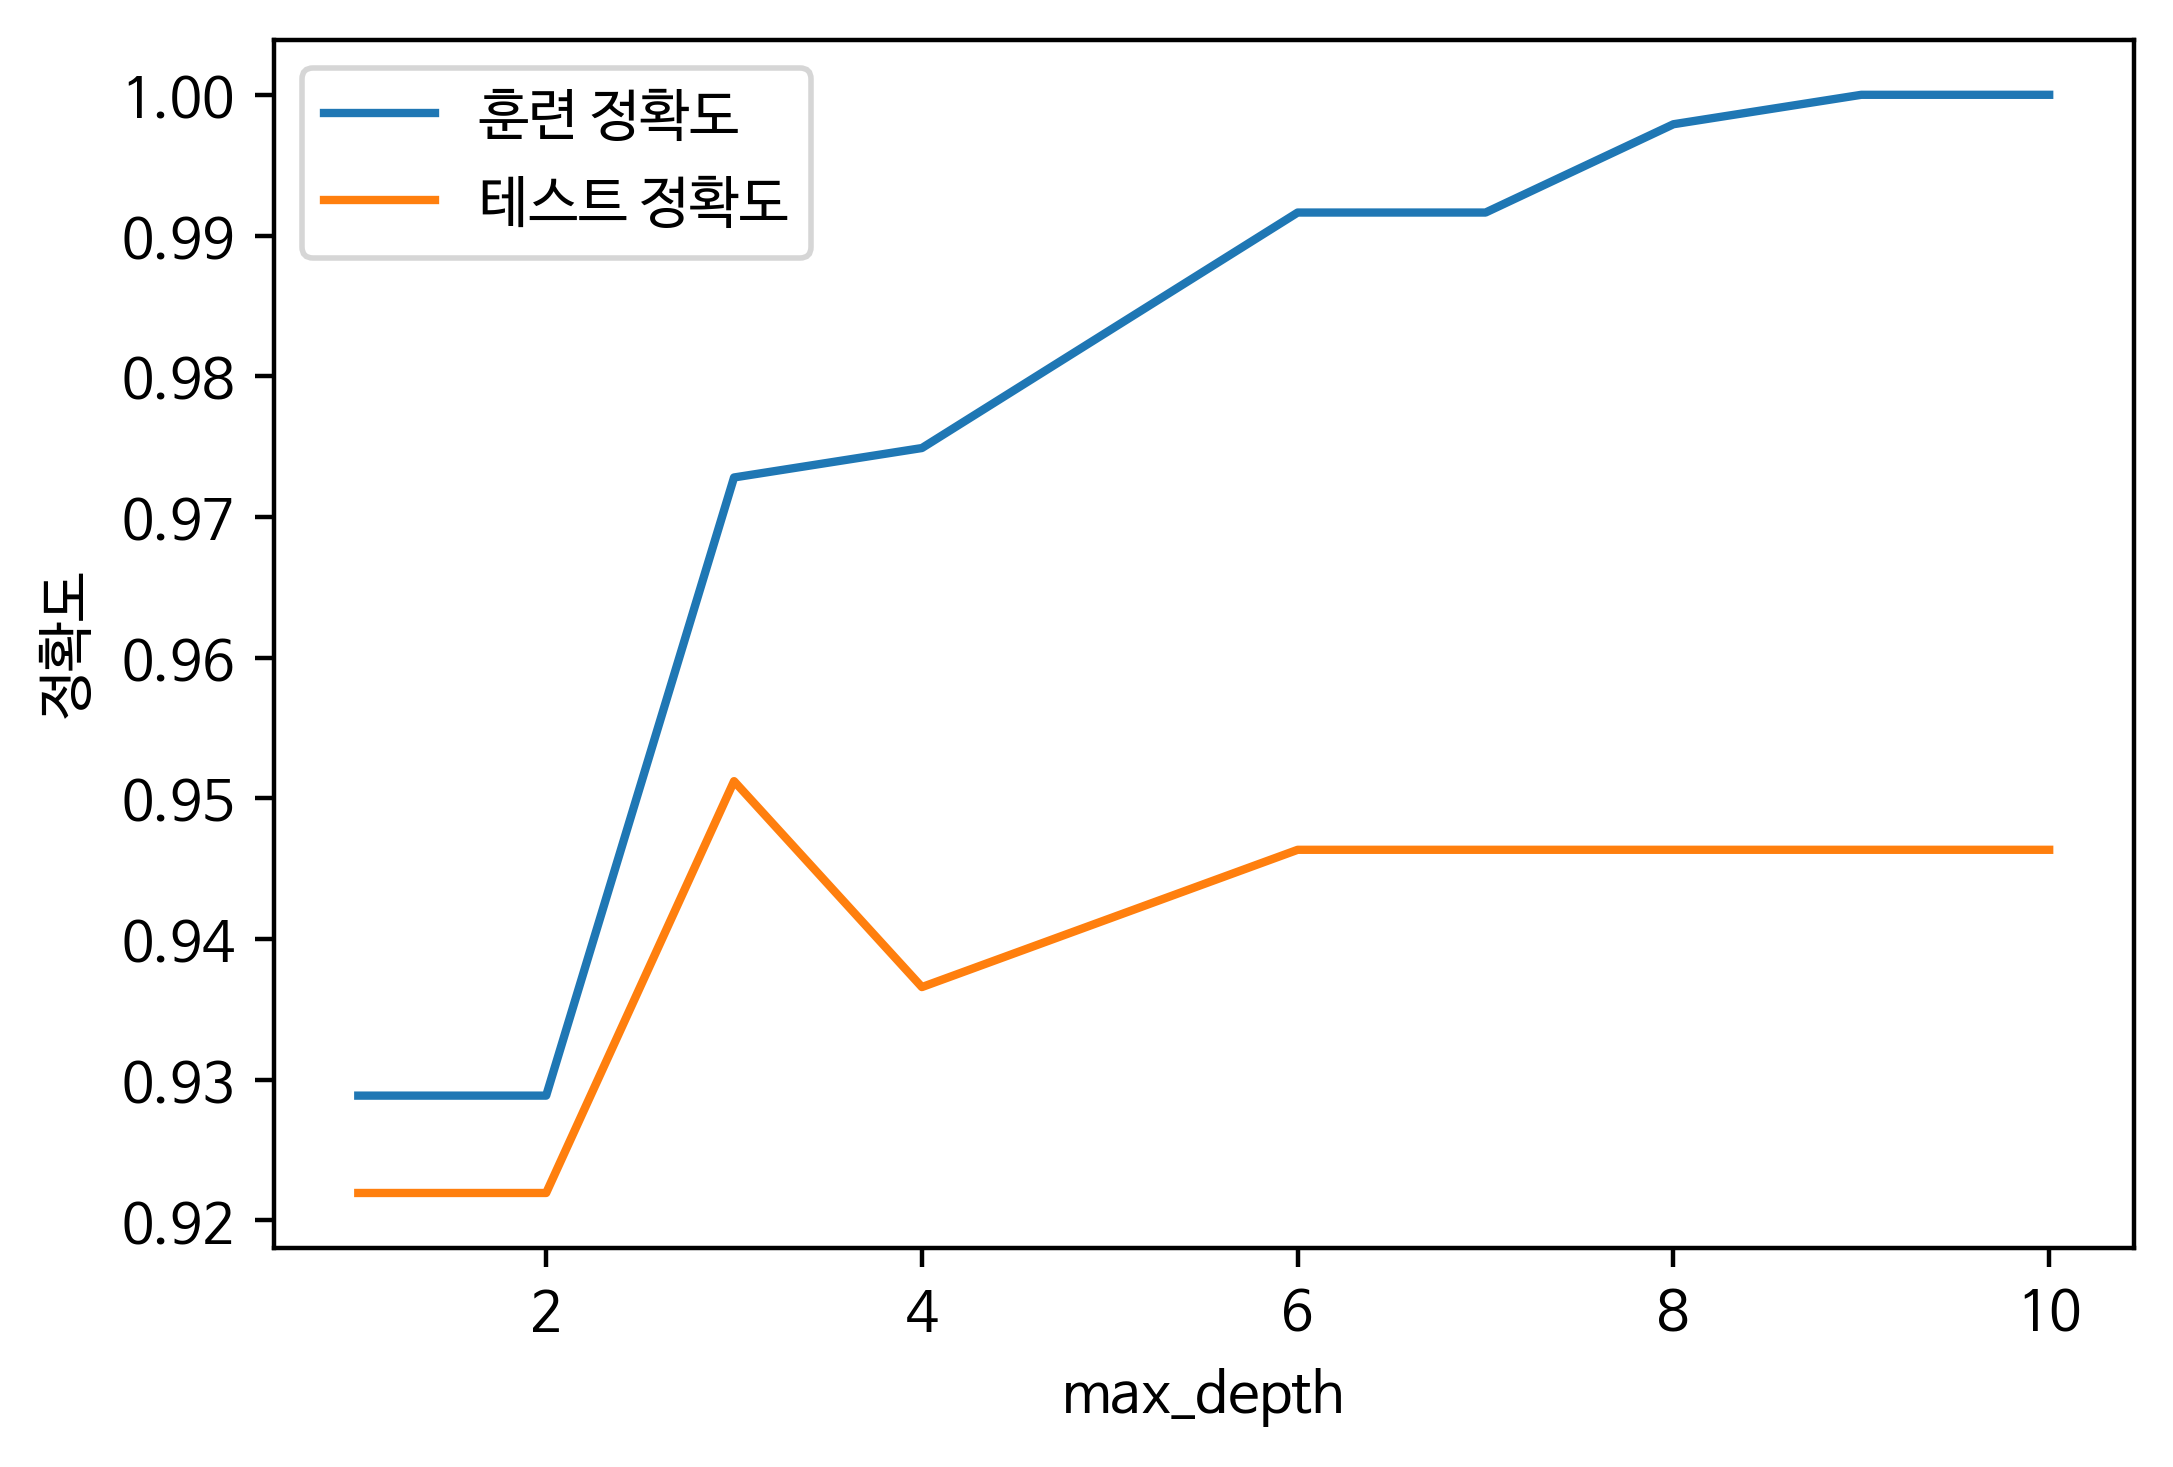

In [ ]:
training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 max_depth 를 적용
max_depth_settings = range(1, 11)

for max_depth in max_depth_settings:
    # 모델 생성
    tr = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    tr.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(tr.score(X_train, y_train))
    # 테스트 세트(일반화) 정확도 저장
    test_accuracy.append(tr.score(X_test, y_test))

plt.figure(dpi = 200)
plt.rc('font', family ='NanumBarunGothic')

plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("max_depth")
plt.legend()
plt.show()

# max_depth=10 은 training 정확도가 1.0에 가까워 overfitting되니
# 좀 더 일반화 가능한 max_depth=3 을 선택